In this project, we will generate a few kinds of object structures:

- Triangle: Right triangle that has shorter edges parallel to axis

   ``
O
OOO
OOOOO
   ``
- Rectangle: Small rectangle

- L shape

   ``
O
O
OOOOO
   ``

In [1]:
from random import random
from random import randint
from random import choice
from numpy import array
from numpy import zeros
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot

In [3]:
def check_in_frame ( size, pos ):
    """
    Allow space around the shape
    """
    if 0 <= pos[0] < size and  0 <= pos[1] < size:
        return True
    return False

def check_in_frame_with_space ( size, pos ):
    """
    Allow space around the shape
    """
    if 1 <= pos[0] < size - 1 and  1 <= pos[1] < size - 1:
        return True
    return False

In [4]:
def generate_rectangle(frame , width, height, position, color):
    """
    Parameters:
    =====================
    frame: squared frame
    width: width of rectangle
    height: height of rectangle
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    """
    size = frame.shape[0]
    other_corner = ( position[0] + height - 1, position[1] + width - 1 )
    
    if not check_in_frame ( size, position ) or not check_in_frame ( size, other_corner ):
        return False
    
    frame[ position[0] : position[0] + height, 
          position[1] : position[1] + width] = np.ones((height, width)) * color
    
    return True

#### Test

In [5]:
f = zeros ((10, 10))

generate_rectangle(f, 4, 2, (2,2), 2)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  2.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  2.  2.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
def generate_triangle(frame, side, direction, position, color):
    """
    Impose an triangle shape structure on the frame, position is where you start it (top-left corner of rectangle)
    
    This is a triangle with side = 4, direction = 0
    
    S
    o o 
    o o o
    o o o o
    
    direction = 1
    
    S o o o
    o o o 
    o o
    o 
    
    direction = 2
    
    S o o o
      o o o 
        o o
          o 
    
    direction = 3
    
    S     o
        o o 
      o o o
    o o o o
    
    Parameters:
    =====================
    frame: squared frame
    side: length of the shorter side of triangle
    direction: 
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    
    """
    size = frame.shape[0]
    other_corner = ( position[0] + side - 1, position[1] + side - 1 )
    
    if not check_in_frame ( size, position) or not check_in_frame ( size, other_corner ):
        return False
    
    inner_shape = np.tril(np.ones((side, side)) * color)
    
    # Generate for direction == 0, and rotate it to the correct direction
    rotated_shape = np.rot90 ( inner_shape, -direction )
    
    
    frame[ position[0] : position[0] + rotated_shape.shape[0], 
          position[1] : position[1] + rotated_shape.shape[1] ] = rotated_shape
    
    return True

#### Test

In [7]:
f = zeros ((10, 10))

generate_triangle(f, 4, 3, (2,2), 1)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [8]:
def generate_l_shape(frame, width, height, direction, position, color):
    """
    Impose an triangle shape structure on the frame, position is where you start it (top-left corner of rectangle)
    
    This is a triangle with width = 4, height = 3, direction = 0
    
    S
    o 
    o o o o
    
    direction = 1
    
    S o o o
    o 
    o
    
    direction = 2
    
    S o o o
          o 
          o
    
    direction = 3
    
    S     o
          o 
    o o o o
    
    Parameters:
    =====================
    frame: squared frame
    width: width of rectangle
    height: height of rectangle
    direction: 
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    
    """
    size = frame.shape[0]
    other_corner = ( position[0] + height - 1, position[1] + width - 1 )
    
    if not check_in_frame ( size, position) or not check_in_frame ( size, other_corner ):
        return False
    
    if direction == 0 or direction == 3:
        frame[ position[0] + height - 1,  position[1] : position[1] + width ] = color
    
    if direction == 1 or direction == 2:
        frame[ position[0]             ,  position[1] : position[1] + width ] = color
        
    if direction == 0 or direction == 1:
        frame[ position[0]: position[0] + height,  position[1] ] = color
        
    if direction == 2 or direction == 3:
        frame[ position[0]: position[0] + height,  position[1] + width - 1 ] = color
    
    return True

#### Test

In [9]:
f = zeros ((10, 10))

generate_l_shape(f, 3, 2, 0, (2,2), 1)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [10]:
generate_l_shape(f, 3, 2, 0, (4,4), 5)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  5.  5.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [11]:
generate_l_shape(f, 3, 2, 0, (0,5), 3)

print (f)

[[ 0.  0.  0.  0.  0.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  3.  3.  3.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  5.  5.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### Create a color codes

In [12]:
codes = ['white', 'green', 'blue', 'yellow', 'purple', 'red']
cm = mpl.colors.ListedColormap(codes)

In [13]:
# Plot function with colors
def plot( frame , l = None):
    # This method might code pixel's value % len(codes) == 0 to be white
    color_frame = frame
    color_frame[np.where ( (color_frame % len(codes) == 0) & (color_frame != 0 ) )] = len(codes) - 1
    color_frame = color_frame % len(codes)
    
    # create a gray scale subplot for each frame
    pyplot.imshow(color_frame, cmap=cm )
    # turn of the scale to make it clearer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # show the plot
    pyplot.show()

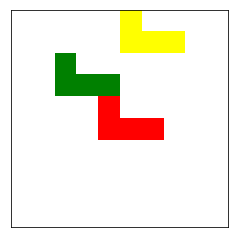

In [14]:
plot(f)

Notice that pixel values in the image would be mapped to range (0, 1) before mapping to the real color values

In [15]:
import generate_rectangle
from importlib import reload

In [117]:
reload(generate_rectangle)

<module 'generate_rectangle' from '/Users/tuando/git/learn-to-perform/target/generate_rectangle.py'>

In [17]:
f = generate_rectangle.generate_frame ( 15, 3, 3, 2, (2, 3) )

#### Testing print colors of shapes looks pretty

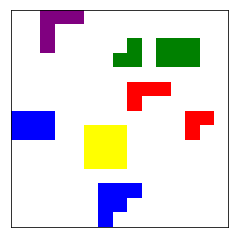

In [18]:
plot(f)

In [19]:
src, target = generate_rectangle.generate_src_target ( f )

In [22]:
def switch ( f, src, target, value ):
    f[src] = value
    f[target] = value

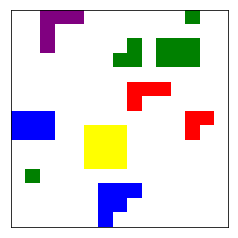

In [23]:
switch (f, src, target, 1)
plot(f)

In [24]:
path_dict = dict( (key, 1) for key in generate_rectangle.generate_path(f, src, target) )

In [25]:
print (src)
print (target)
print (generate_rectangle.generate_path(f, src, target))

(11, 1)
(0, 12)
[(10, 1), (9, 1), (9, 2), (9, 3), (9, 4), (8, 4), (7, 4), (6, 4), (6, 5), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (2, 7), (1, 7), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11)]


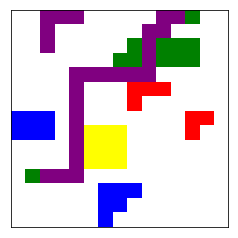

In [26]:
path = generate_rectangle.generate_path(f, src, target)
for p in path:
    f[p] = 4
plot(f)

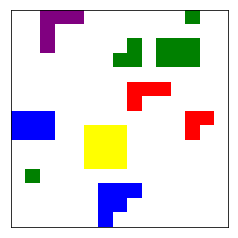

In [27]:
for p in path:
    f[p] = 0
plot(f)

#### Block the path, so that the shortest path has to go through another way

One of the problem with our generation is that when we choose the shortest path, the path might be not complex enough for high level of description/instruction

In [28]:
def get_walls( f, path_dict ):
    """
    Return all paths between two shapes that block the running of this path
    
    Parameters:
    ==========
    path_dict: dict from point of the path to 1
    
    Returns:
    ==========
    """
    walls = []
    for i in range(1, 9):
        for j in range(i + 1, 9):
            wall = generate_rectangle.shortest_path (f, i, j)
            if not wall is None:
                for p in wall:
                    if p in path_dict:
                        walls.append(wall)
                        break
    return walls

In [30]:
switch (f, src, target, 0)
walls = get_walls (f, path_dict)

#### We print out a path blocking our path

Here we can see that the path between the green and the blue shape blocks the path between our source and target

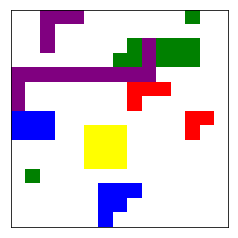

In [31]:
for p in walls[0]:
    f[p] = 4
switch (f, src, target, 1)
plot(f)

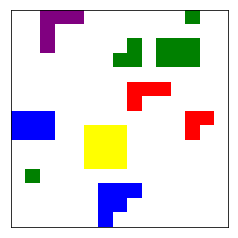

In [32]:
for p in walls[0]:
    f[p] = 0
plot(f)

### We regenerate f to save the previous part

In [56]:
f = generate_rectangle.generate_frame ( 15, 3, 3, 2, (2, 3) )
src, target = generate_rectangle.generate_src_target ( f, 20 )
switch (f, src, target, 1)
path = generate_rectangle.generate_path(f, src, target)
path_dict = dict( (key, 1) for key in path )

In [57]:
saved_f = f.copy()

In [58]:
f = saved_f.copy()

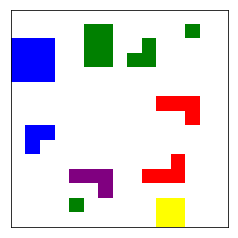

In [59]:
plot (f)

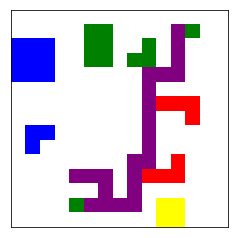

In [60]:
for p in path:
    f[p] = 4
# switch (f, src, target, 0)
plot(f)
for p in path:
    f[p] = 0

In [149]:
def generate_path_after_block ( frame, source, target ):
    f = frame.copy()
    
    path = generate_rectangle.generate_path(f, src, target)
    if path is None:
        return None
    
    path_dict = dict( (key, 1) for key in generate_rectangle.generate_path(f, src, target) )
    
    walls = get_walls( f, path_dict )
    
    if len(walls) == 0:
        return path
    
    # Select the shortest walls
    walls = sorted(walls, key = lambda wall : len(wall))
    
    # Choose one of the shortes walls
    pick = np.random.randint(0, min(len(walls), 4))
    for p in walls[pick]:
        f[p] = 4
    
    # regenerate path
    path = generate_rectangle.generate_path(f, src, target)
    
    return path


In [61]:
new_path = generate_path_after_block (f, src, target)

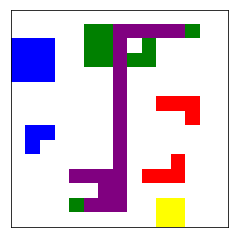

In [62]:
for p in new_path:
    f[p] = 4
plot(f)
for p in new_path:
    f[p] = 0

#### Our maze doesn't look good enough

Probably by making them sparser, the result would look a little bit better.

Let's make a version of generate_rectangles that doesn't stop when the right number of rectangles has been produced, but trying to replace the dense rectangle with sparser one

In [41]:
def distance ( rect1 , rect2 ):
    """
    rect1 and rect2 have the following forms (pos_x, pos_y, height, width)
    """
    pos_x_1, pos_y_1, height_1, width_1 = rect1
    pos_x_2, pos_y_2, height_2, width_2 = rect2
    
    center_1 = (pos_x_1 + height_1/2, pos_y_1 + width_1/2)
    center_2 = (pos_x_2 + height_2/2, pos_y_2 + width_2/2)
    
    diff = (abs(center_1[0] - center_2[0]), abs(center_1[1] - center_2[1]))
    
    # min ( max (0,x_diff), max (0,y_diff))
    distance =  max (0, diff[0] - height_1/2 - height_2/2 ) + max (0, diff[1] - width_1/2 - width_2/2 )
    
    return distance

In [42]:
def distance_to_edge ( rect, width, height ):
    pos_x_1, pos_y_1, height_1, width_1 = rect
    
    center_1 = (pos_x_1 + height_1/2, pos_y_1 + width_1/2)
    
    diff = max (0, np.min ([ pos_x_1, pos_y_1, height - pos_x_1 - height_1, width - pos_y_1 - width_1 ]))
    
    return diff

In [43]:
distance ( (2,2,3,4), (9,8,1,2))

6.0

In [44]:
distance_to_edge( (2,2,3,4) , 7, 7)

1

In [45]:
reload(generate_rectangle)

<module 'generate_rectangle' from '/Users/tuando/git/learn-to-perform/target/generate_rectangle.py'>

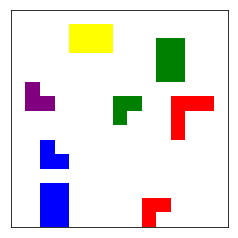

In [46]:
f2 = generate_rectangle.generate_frame ( 15, 3, 3, 3, (2, 3) )
plot(f2)

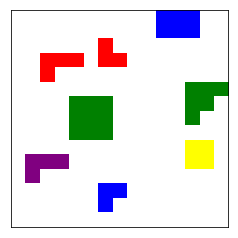

In [47]:
switch (f, src, target, 0)
plot(f)

In [147]:
from matplotlib import animation
import io
import base64
from IPython.display import HTML, display_html

# Plot function with colors
def plot( frame , l = None):
    # This method might code pixel's value % len(codes) == 0 to be white
    color_frame = frame
    color_frame[np.where ( (color_frame % len(codes) == 0) & (color_frame != 0 ) )] = len(codes) - 1
    color_frame = color_frame % len(codes)
    
    pyplot.imshow(color_frame, cmap=cm )
    # turn of the scale to make it clearer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # show the plot
    pyplot.show()
    
def animate ( frame, src, target, path, show = True, name = 'abc.mp4', fps = 10, label = "" ):
    """
    
    """
    fig, ax = pyplot.subplots()
    # ax.get_xaxis().set_visible(False)
    ax.set_xticklabels([])
    ax.yaxis.set_visible(False)
    ax.set_xlabel(label)
    ax.xaxis.set_label_position('top')
    
    def get_color_frame (frame, i):
        color_frame = frame.copy()
        if i == 0:
            p = src
        if i == len(path) + 1:
            p = target
        else:
            p = path[i-1]
        color_frame[p] = 4
        color_frame[np.where ( (color_frame % len(codes) == 0) & (color_frame != 0 ) )] = len(codes) - 1
        color_frame = color_frame % len(codes)
        return color_frame
    
    color_frame = get_color_frame(frame, 0)
    im = pyplot.imshow(color_frame, cmap=cm, animated=True )

    # animation function.  This is called sequentially
    def anim(i):
        color_frame = get_color_frame (frame, i)
    
        im.set_data(color_frame)
        return im,

    # mywriter = animation.FFMpegWriter(fps=30)

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, anim,
                                   frames= range(1, len(path) + 2), interval=1)

    # save the animation as an mp4.  This requires ffmpeg or mencoder to be
    # installed.  The extra_args ensure that the x264 codec is used, so that
    # the video can be embedded in html5.  You may need to adjust this for
    # your system: for more information, see
    # http://matplotlib.sourceforge.net/api/animation_api.html
    if name:
        anim.save(name, fps=fps, extra_args=['-vcodec', 'libx264'])
        # anim.save(name,writer=mywriter)
    
        if show:
            video = io.open(name, 'r+b').read()
            encoded = base64.b64encode(video)
            display_html(HTML(data='''<video alt="test" controls>
                            <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                         </video>'''.format(encoded.decode('ascii'))))

<source src="data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAEGRtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1MiByMjg1NCBlOWE1OTAzIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAH0mWIhAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAzdiJ7g8K10QDf7U0phX/8AByHppZ1vyvfX6or0ldsDOCMo0OxFW+kSPappwbKilURGhT+Fqw8XgVFbwhPT5AS/D7UclbYMk1iRi653tv/GwfJ2nA6nqdjeE3bTOuIbJPUqiBTVCuFYC5/7rEjoxE5OGQT8QsaMP8oj6r9st11nl21aJ5oAAISKcMIFP1OF3G2oMBjkXLVWcvj5PMgr6SsnrrIfjqhUDzUisCT1NVW9wK99Q0Q0cek9ELC1sB+YB8hUIxxBIpOIJwRY22o7lAbmDZt8W2i+0RVAGrdYDrbxkIH6z3B7WvsOrpXB9Jo4KND/WNNu4n2Fy264Nr2o4SJf7LQUb+4YZ/z/1NiKSnqqlbgdHv+sJj1wUHzsOKP6MyI25mJG//EHmktbMhp99vr7UoEqsR2bVW2SAt4wh8s/IvOYbHnsjllUqexClvaPZLV98HWsEvadDQvokkThJNNkZ/SnmwUv9C2xEc3AU99RSgpVUFfMTnI7wUwLOfwEh6aDj0stvzK6/Ou296wJUMp18332+srTQbLg71npbcawnwk921uIb+IE94HvHA4l90+gmp/kupkNsqKFmDkZfreQVIaEhnOqmGxAADK0czIa1KR9emlh8F4sNG5vS5Y/CW9w8P3AfQ/uoO5fF4HBK8fPA4HnU+i1bIEU4g2CNr6Zc93it0HjF9YjraXE7S50jRPT/vytTmwuzVEcvXvTGulgUN411SGr87XmU2JZCHf4I1YlPGt/lkjATH33/Xfsr/ETKU3UYL3igrbhAphmzVeTruoTbeAiZQyXPZqf0yrEY84UZOkJM9khnMvR977x2eP+fVvxt7iEAZOfAhUDAD2+wj5ZXf+/WsKvGlQIz/oYPLkbdrm8l+wC8uYT+38ZgcvXo6LMZpbpPVUR2ZxCsSXbM1L9KWFjbIks1kRGJzO+ljTTdcafCXZIfVBVk3bsy+LJpXkVbJKwJjDnyqb9TWYhZJXivblMvVeg2YoVaMq5dMzuOZpkyG5yn25Ri9oInlOAIgi+Wwfq0AuYRUs89cpvqE4ke67HE9nzShVu7MXYaAZG69d9HCL4Y992Aryr+IFuxpkVtFxCo4NQTcg+P7R5llIB4ZD35E71EFvUp0HrOdQL1WPEjaWiMxhkxw4a5hl/l70rVcEPA1nil+0G/scYQH9VltREW5QVfvpeLx2xvxnbQj/COboLsdCnfxuHH7xjASv1c7D/VT+WYc3a64ROj+iDyXdlmA0LGD0bBz41l2BtyuSQg/ZHX5zGzihrzk5Jq2St3LTX/Ok0Bn9v/TE3FqWqPoatBPYpBqLxkTpSo7V+MID1CU9+uv/wXbuu6dd2c5LJt2CBGXVM+/FgJekScQOUlEAQvhkfpg6AyaY7BmSM7fpI6gOzTzA1qYG7CQ+JneG7Iq7zdbrkzoawH6zZ0mTz/H8PL9YGMRY0lsJkuoxznlauXM1iaMc+GAUj6ccm+UeVY8nhkGddbI8aLdqEeN1EK5jdrIyT6qo+Tu1yssOXglTI48FObePq251ogqHgRS8erUQwisRPu0WR5raNMV+816Ofz2jPCZm8hrIKZsW8EPWl1UXbA3fKBhXIUrkiKXNrpGq4U2tOeFo7ZOuv5VvjG2mMR28w7a9J5jX8GBJFeusLjrGF9Mp/DsQhyKWYRctgkR7fyd4qwnQeQkev7eVbU9ZACvNLf/wlvTWQoFvoVbgUT6UreII6XZPwcoTcxaYi4BaBcGeWiKW1ObzWjmFj8eHVoY6CeN91ZerlF3dh92oPo3e9XEOu0l2ka3h+iLoV9GILS7vilw2ottDN0xN54j7qw2MGwtT3QWYg7SMHHpYVLRr6Yx1DfsACFcfx80luMIeOFS5NGakBt6vwjusROUWfyxgV+p1IaxpCIBeuz5X+TIVGspVeF288vWgNohMSlj6JZnL9lR4lPXzytA3sIeX3rtH+baFcTTF5RoPvNGkvYx41FZITMUIq5fSmlvl33nQgwwXp4THcDa8TLW7WFaoNhbCPkNPDS7XGrCPOhY2yohl4BJmMUIwudzb+f3rHxUd7v3df6FSGj/iaunjvR2wK2V5uwm8ADmLOOO8WE7M/lI77/73BIZ5/SBgVlW9f5baUkGXMXh7N48GikWrygDOj8w4TVohhbTlIBtWm9TKetj6NXkzfIDBmrYC57RJmYpBesKsW/Tud8uCrIDjeF0XqfjwifedvXPwiEb0Dm1hGNouZTZCl10S1/oNnvj8CxXwIGObCJXBGcSchAw6QyfJakUVP6UB2qiuL/9HpZscnEq6FPNjfzP3El38uHXmg29/YVnNaVPXxHnO8ue9eETa3AVm/znTU+9yjEHNS8uEFvNZequG3MQEvM4YKwF9WGwPq8tTuJ4i2O1fRq+ETSkC4+Zbgt2SFNuAVtfMoUP3FSnJawYgQmudUOD2EzGuOf90jfEyXwKWsHHXuxe3SCy5/2f3rDvyR8Krr0ESqZqMhV3dD77BqDGZXOLJ95ZiAj22AbHdx1PPzZLZOEmykH70ch+C2FXrL/nwXfXoRmOkxcJ5e2auA4gH6mxHXoNkEZUNe/A+yGfp5Jp4aZT8O+ZpIfkaU27yf+fLnE1ohcLnnb/H3NeAAETEAAAEoQZoibEEf/rUqgI+R1ABEqRvACb9I2Fpf6fGGWnXNXvDbYXv/+aklTP19yD3M5K22z5p2+WXM5MgfDnTILW/woKDcOovH4NdePxHaBvp3xcAvePuVt4+rvFnbMWdaZb0aIgcUqHl96T+KIzbh8le7Px1i3ydPCGx37ZmDm9GnE49XUlnTCMFIIc4TAxyrztrOuGbhfGMIDTSvpKeKUNk/2cECi6j+UyXIsvAGXAP/6tYuWD9PePmIUOd1MDqNBp3j7zNcpjW7KE2TP0I5I13E91KADSlGia8bveczXPg/m6zzI

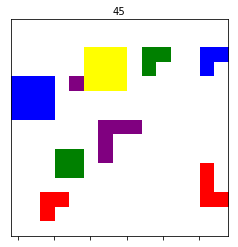

In [148]:
switch (f, src, target, 0)
animate(f, src, target, new_path, name = "1.mp4", label = i )

In [146]:
print (src)
print (target)
print (new_path)

(3, 4)
(12, 12)
[(4, 4), (5, 4), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11)]


Generating done!!


/Users/tuando/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/tuando/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/tuando/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

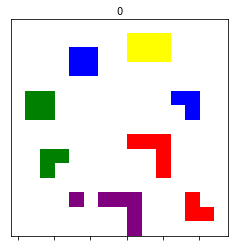

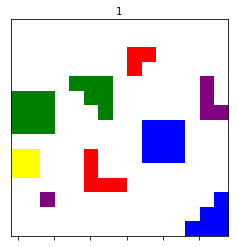

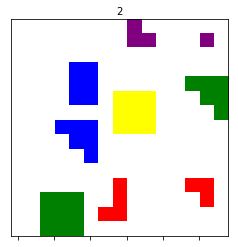

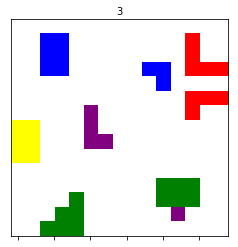

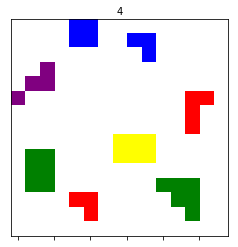

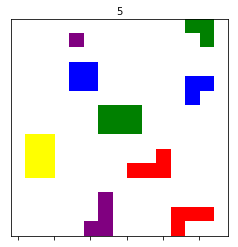

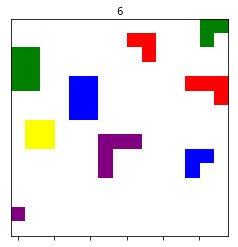

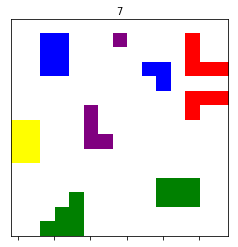

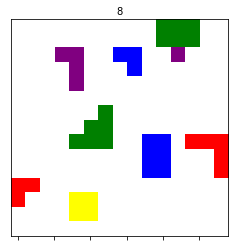

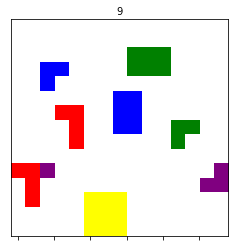

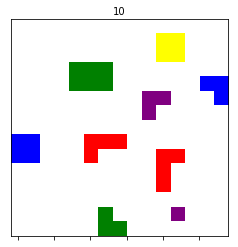

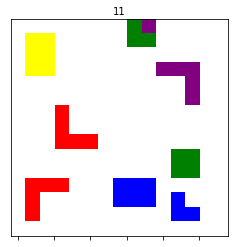

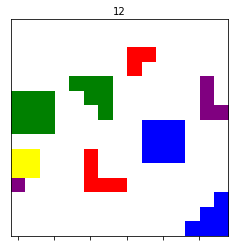

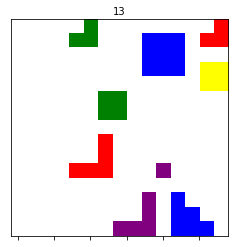

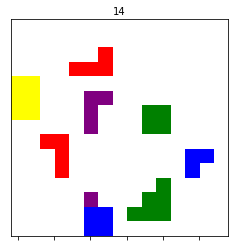

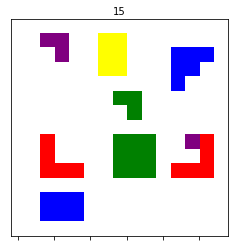

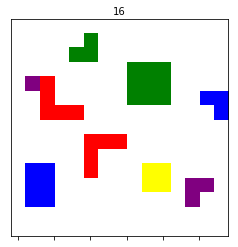

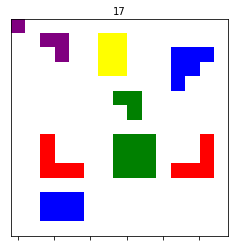

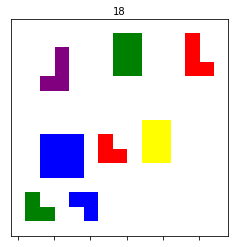

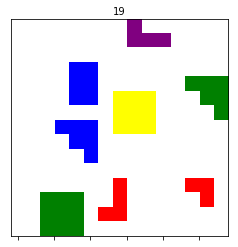

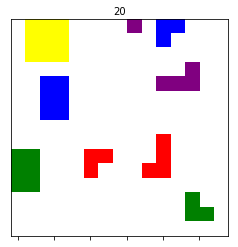

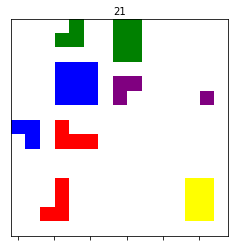

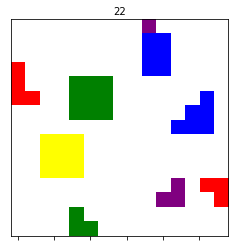

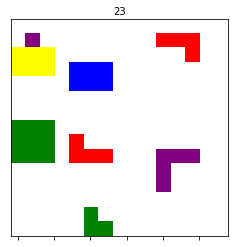

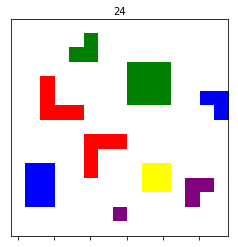

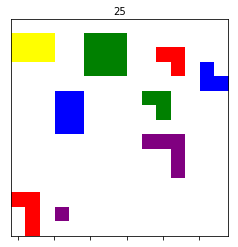

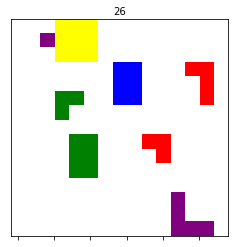

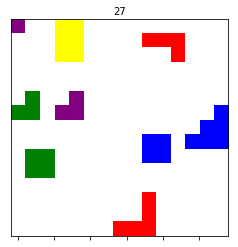

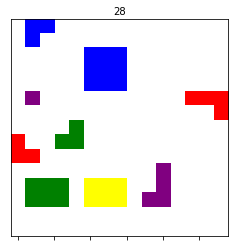

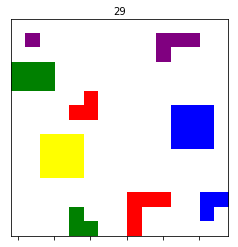

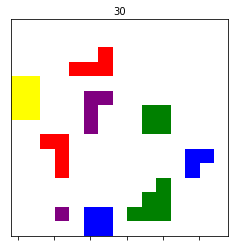

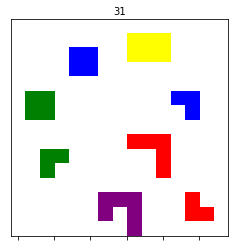

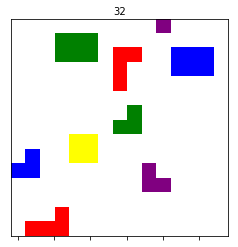

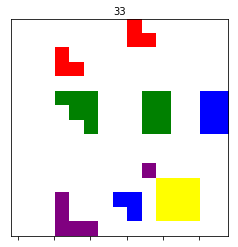

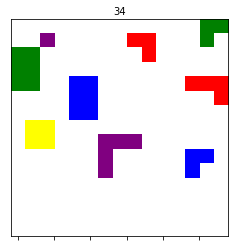

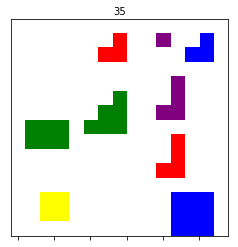

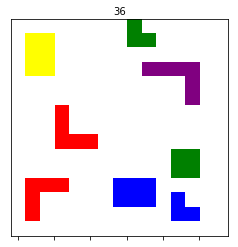

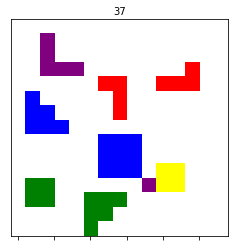

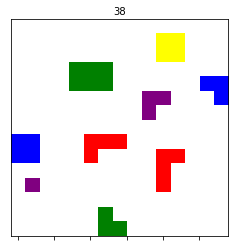

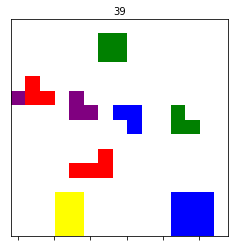

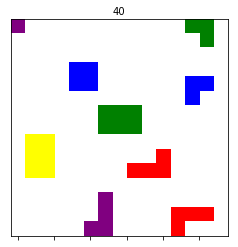

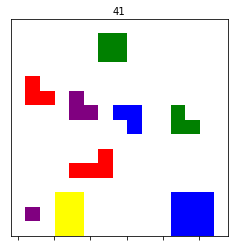

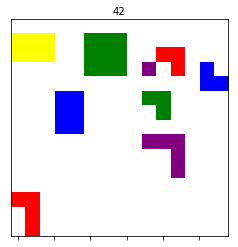

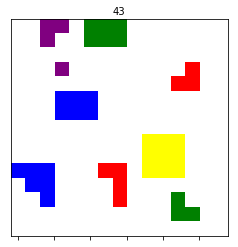

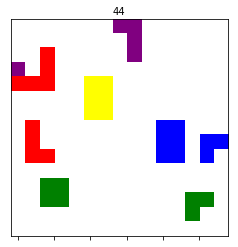

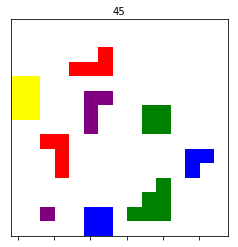

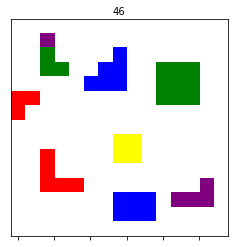

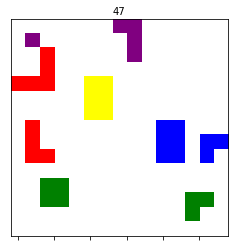

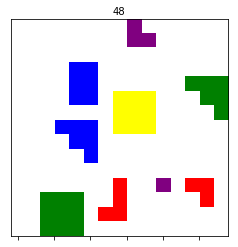

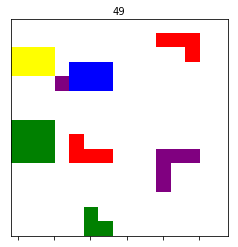

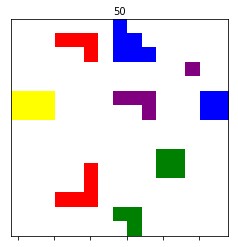

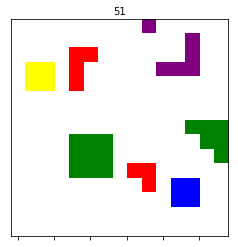

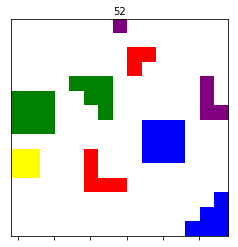

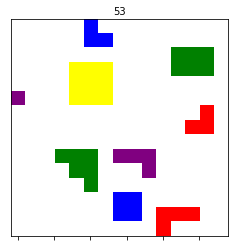

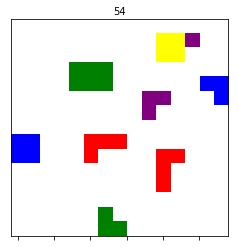

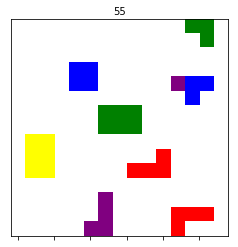

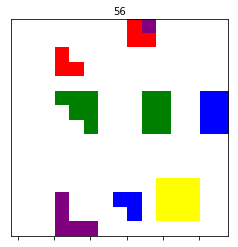

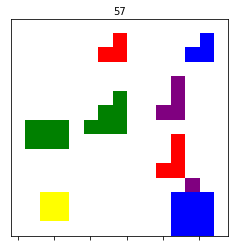

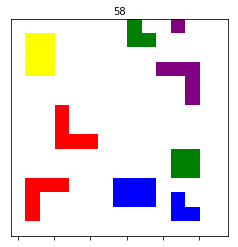

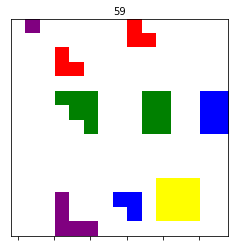

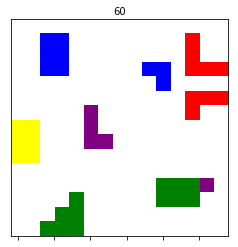

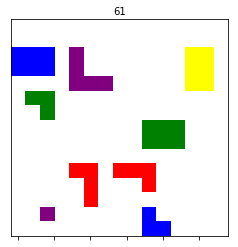

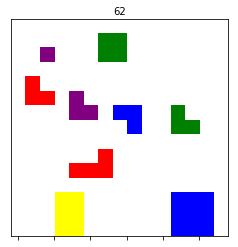

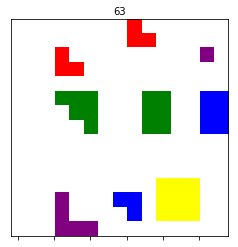

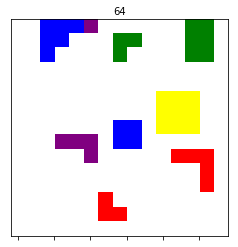

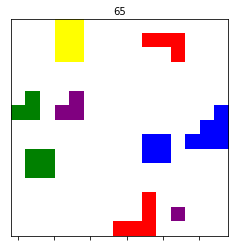

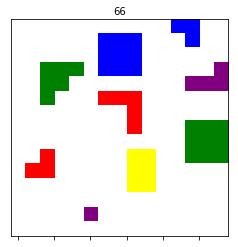

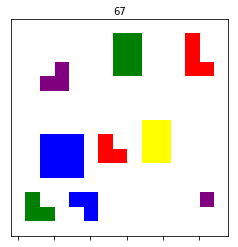

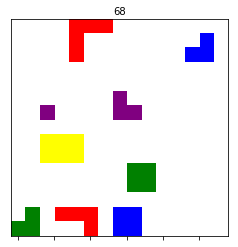

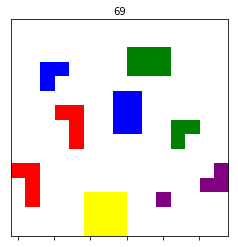

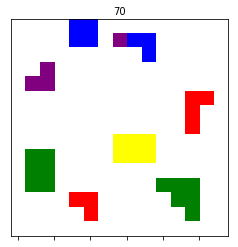

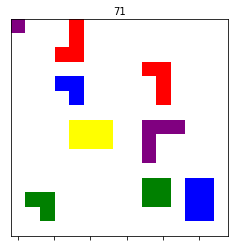

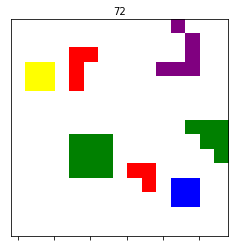

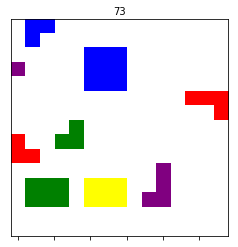

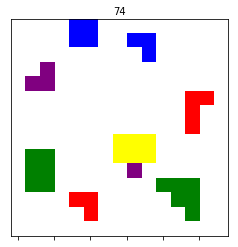

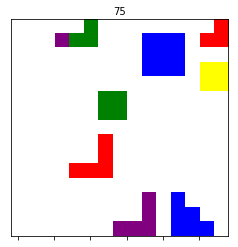

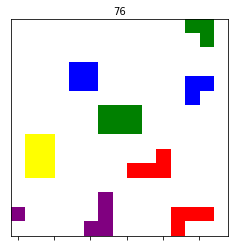

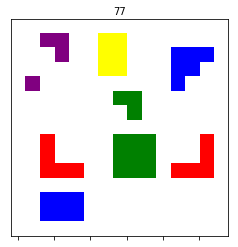

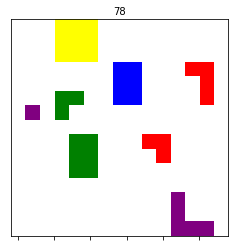

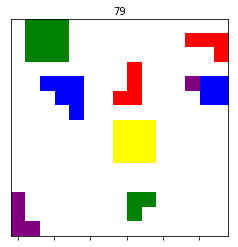

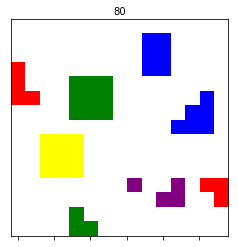

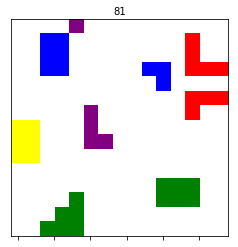

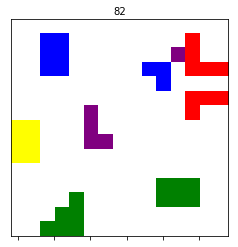

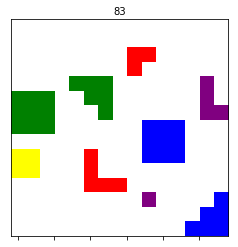

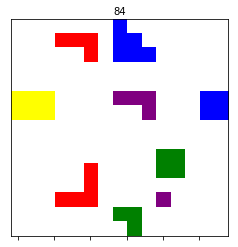

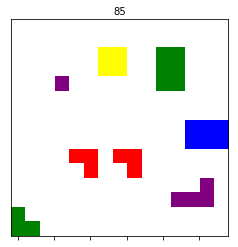

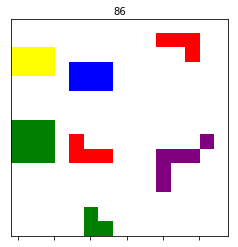

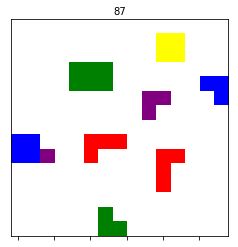

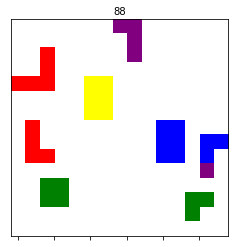

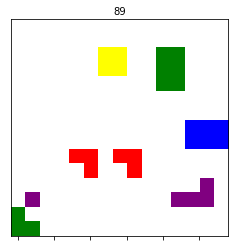

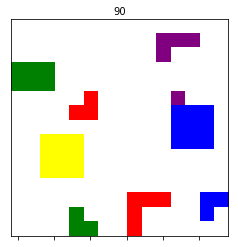

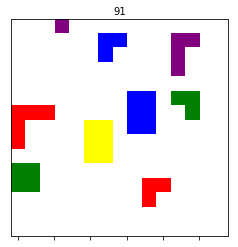

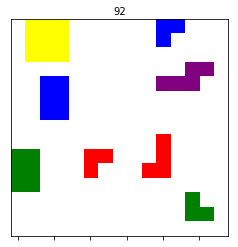

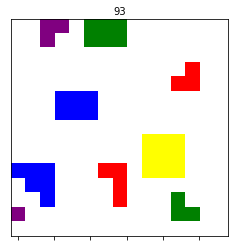

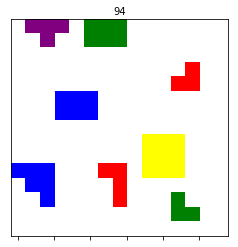

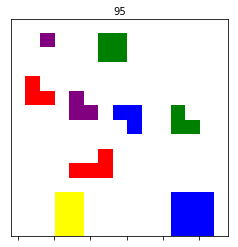

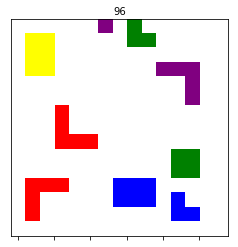

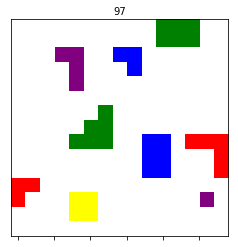

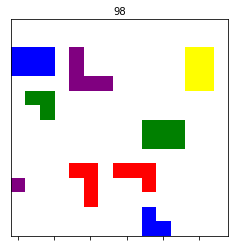

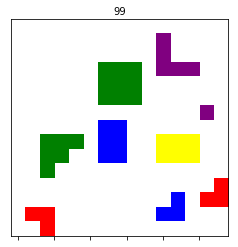

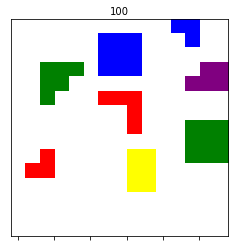

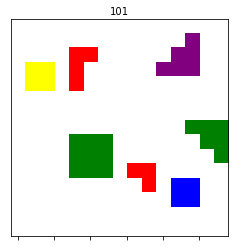

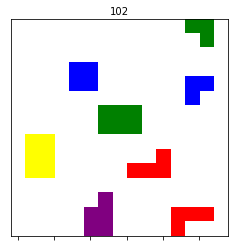

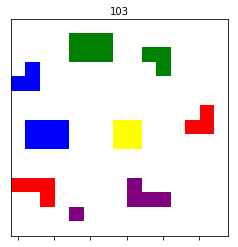

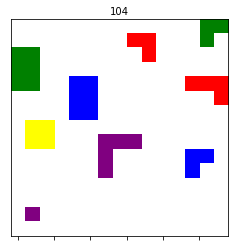

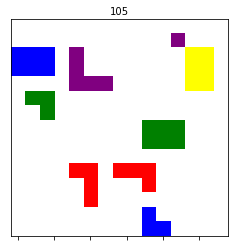

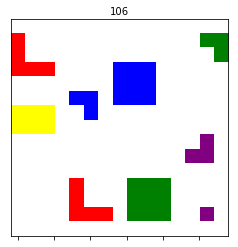

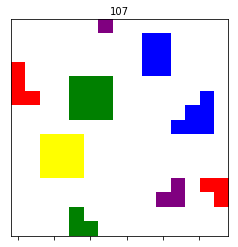

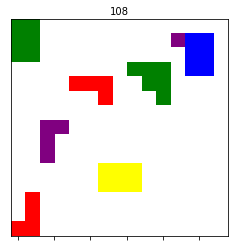

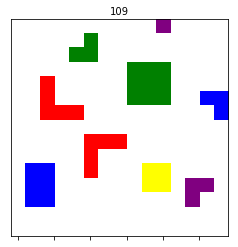

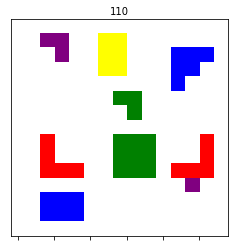

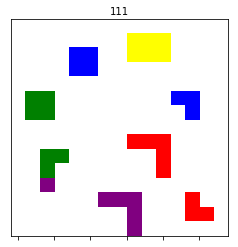

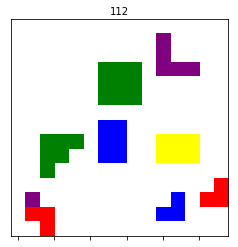

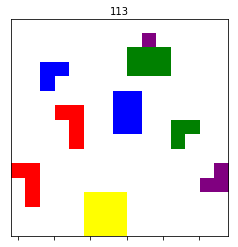

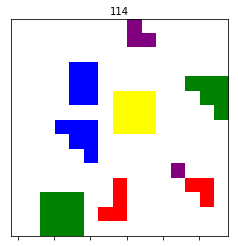

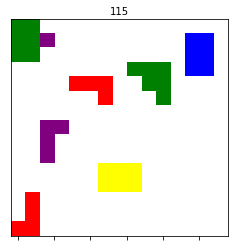

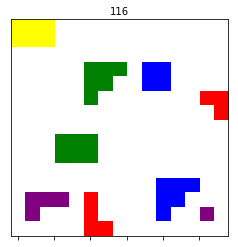

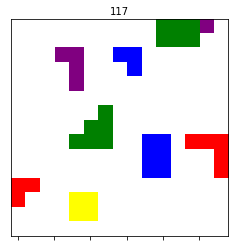

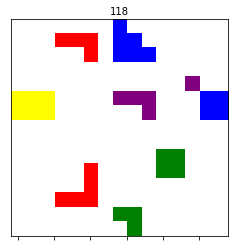

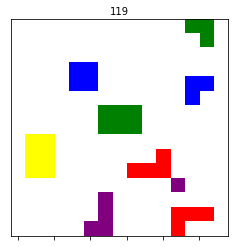

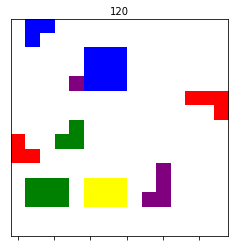

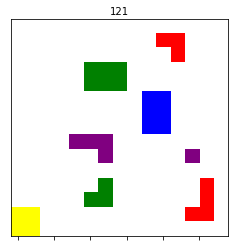

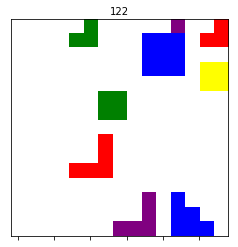

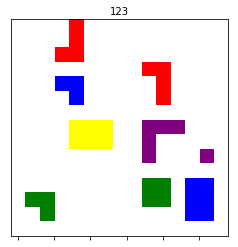

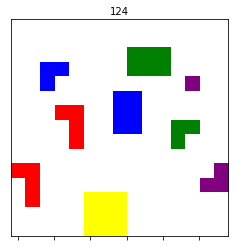

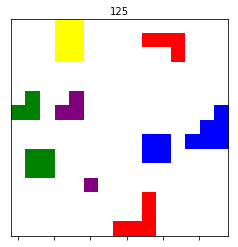

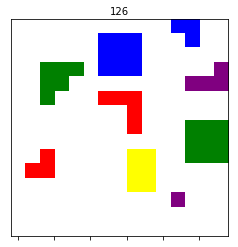

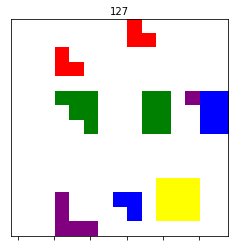

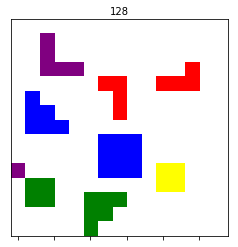

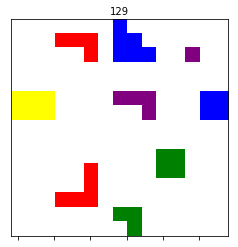

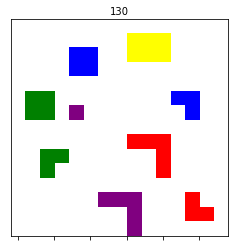

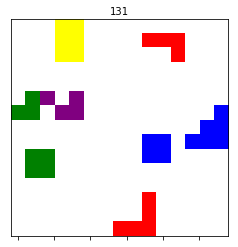

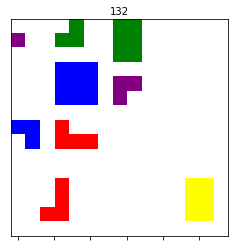

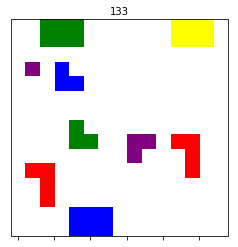

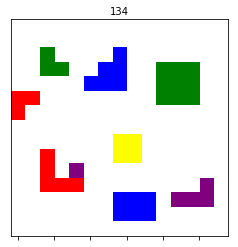

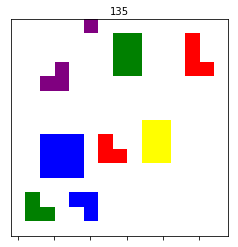

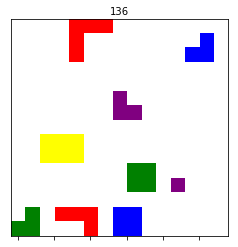

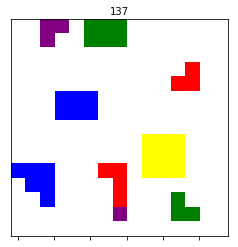

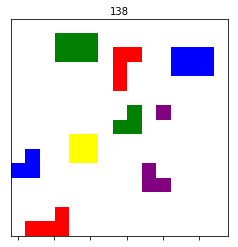

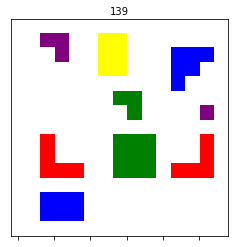

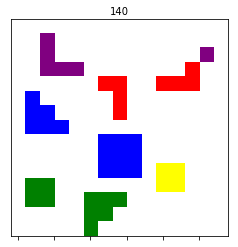

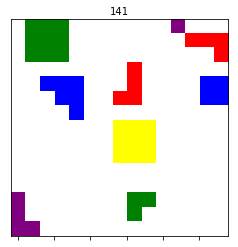

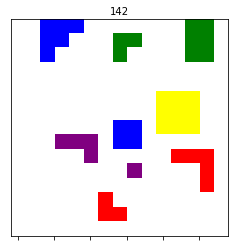

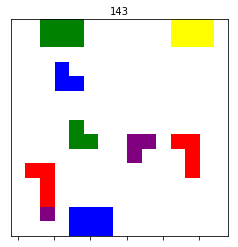

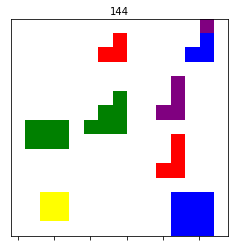

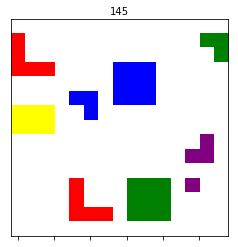

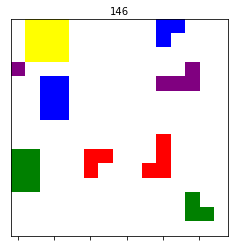

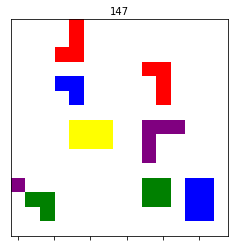

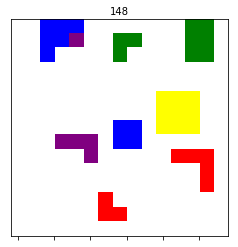

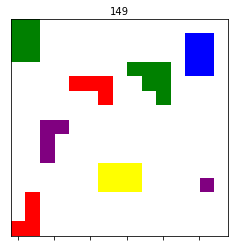

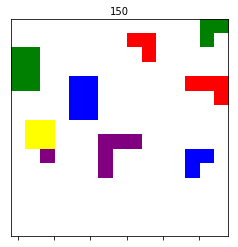

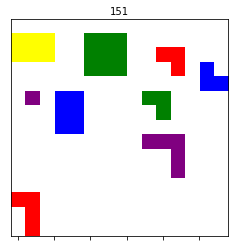

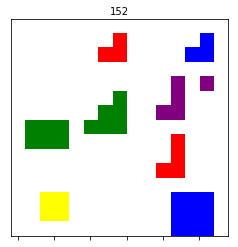

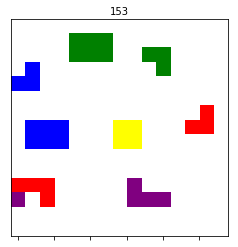

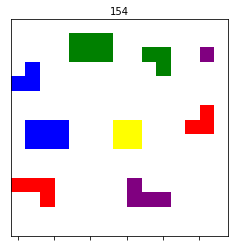

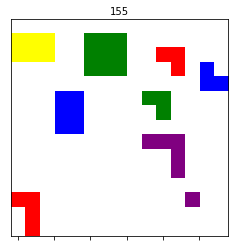

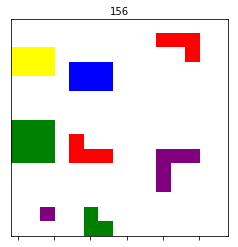

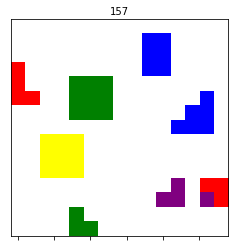

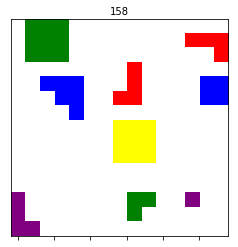

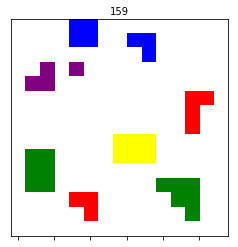

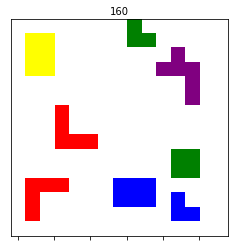

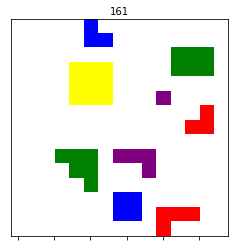

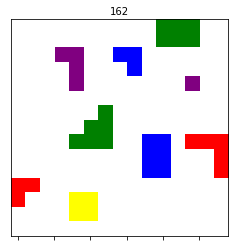

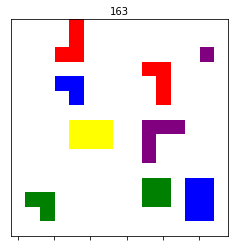

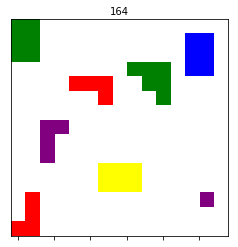

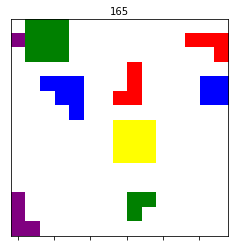

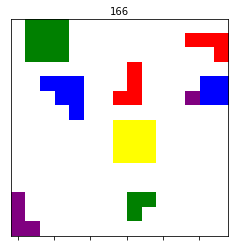

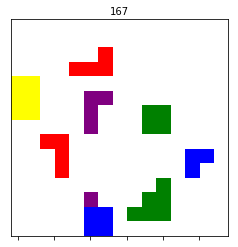

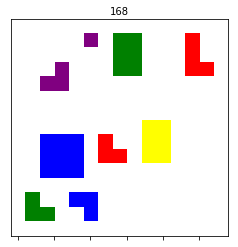

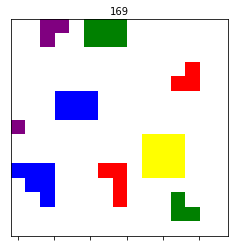

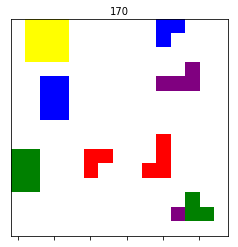

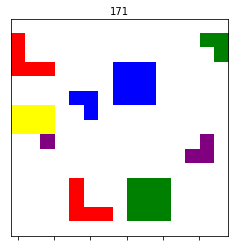

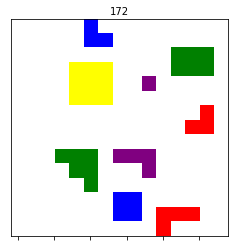

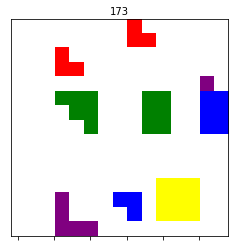

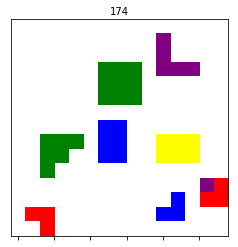

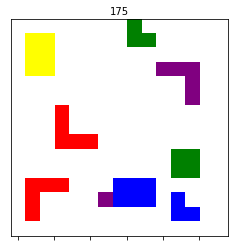

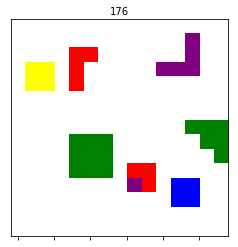

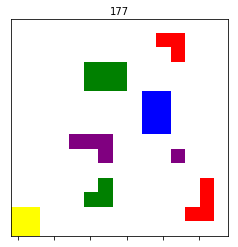

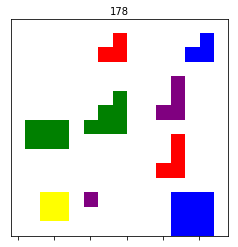

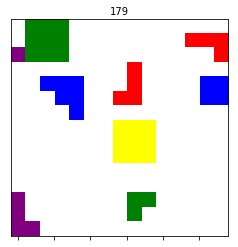

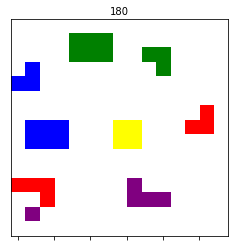

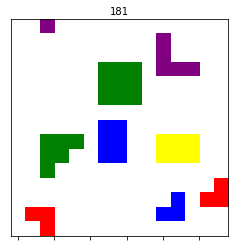

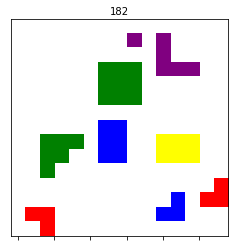

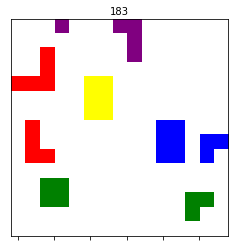

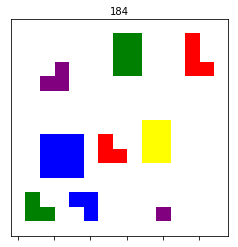

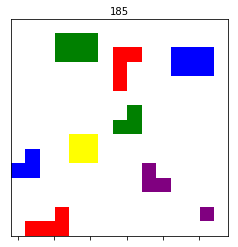

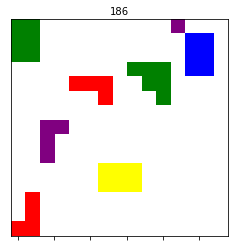

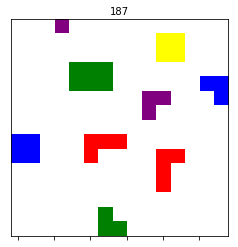

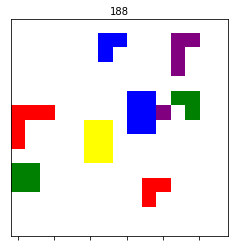

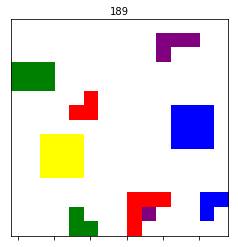

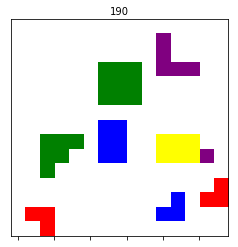

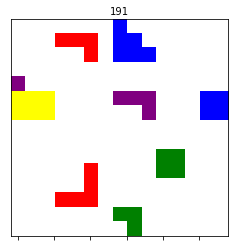

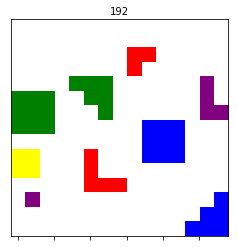

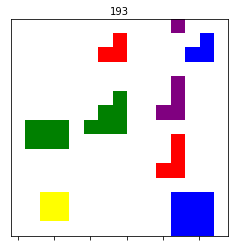

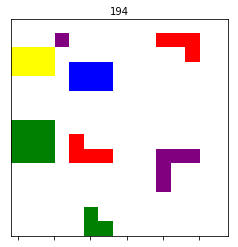

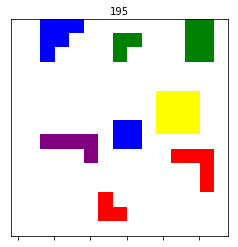

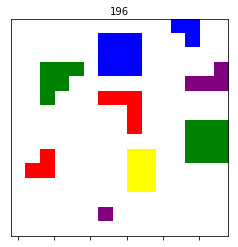

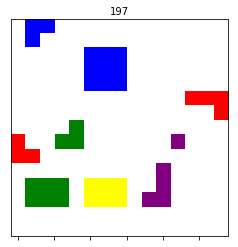

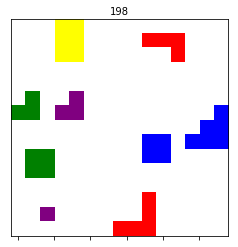

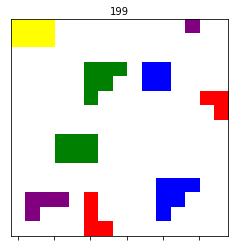

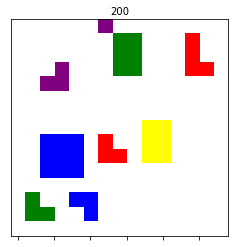

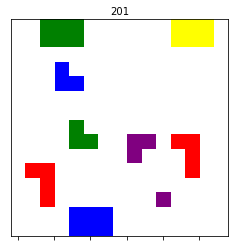

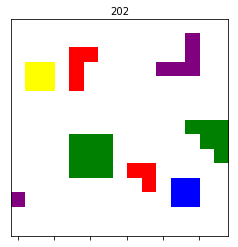

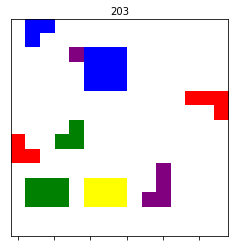

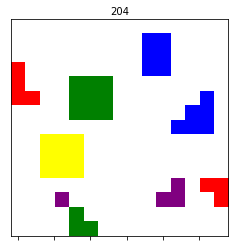

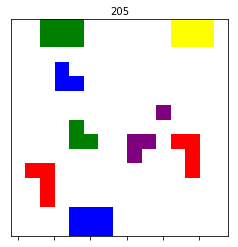

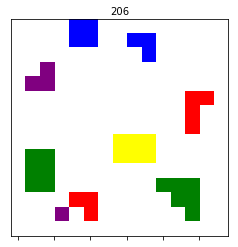

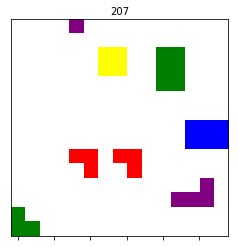

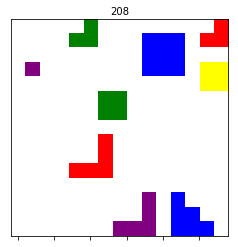

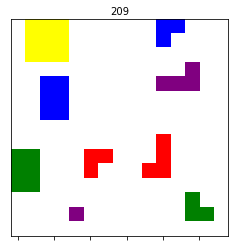

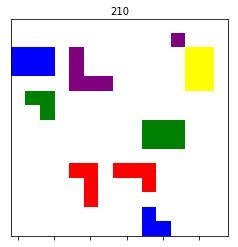

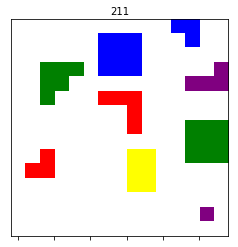

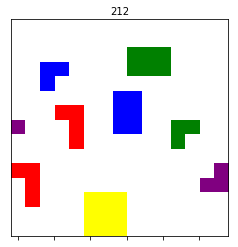

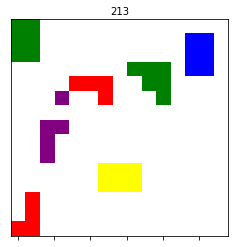

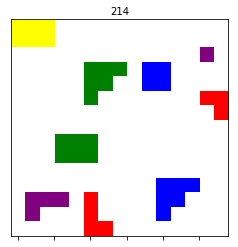

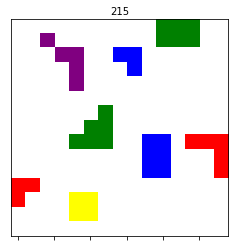

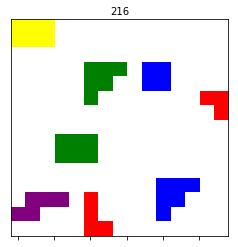

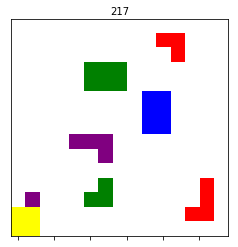

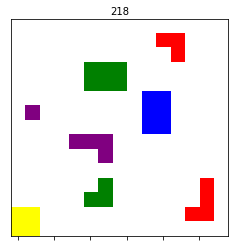

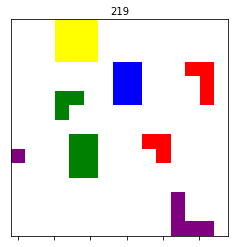

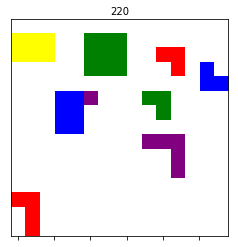

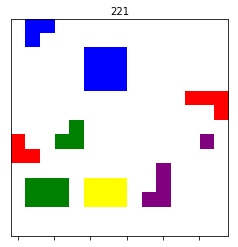

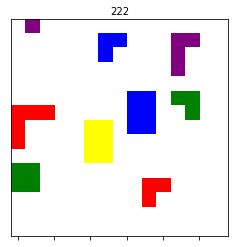

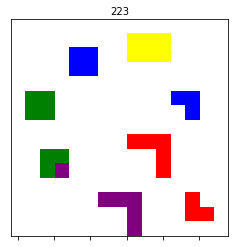

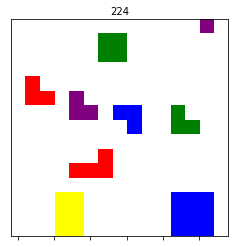

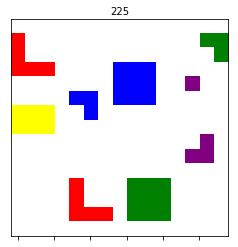

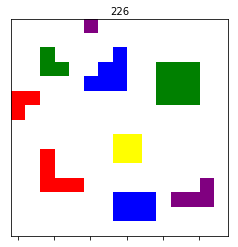

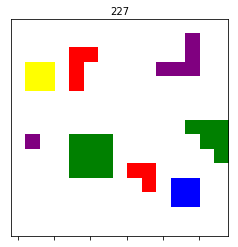

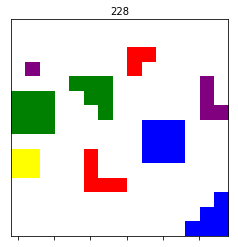

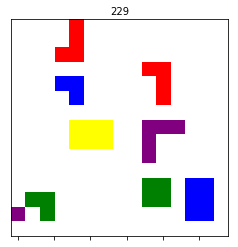

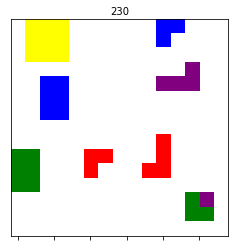

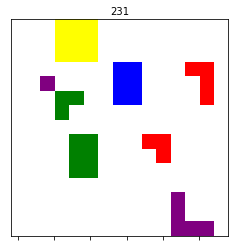

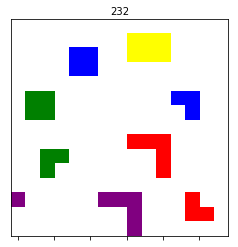

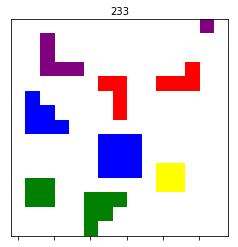

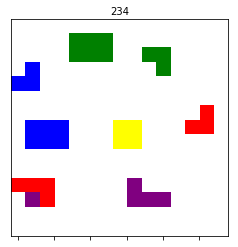

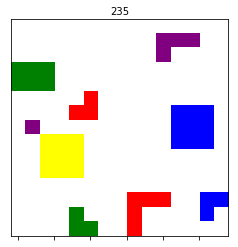

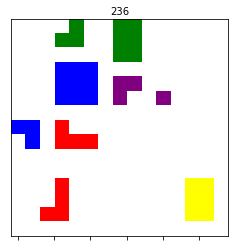

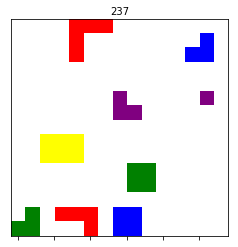

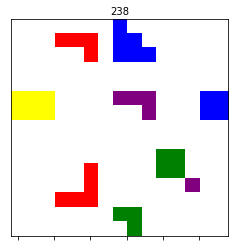

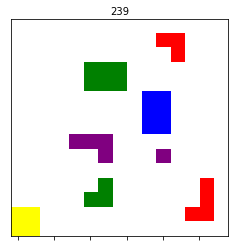

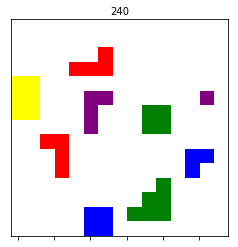

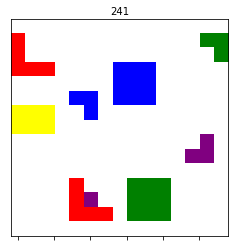

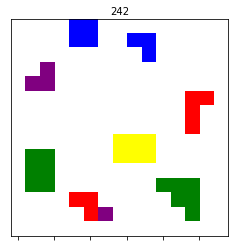

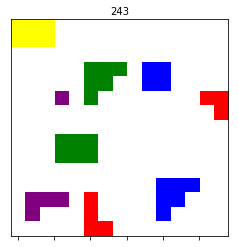

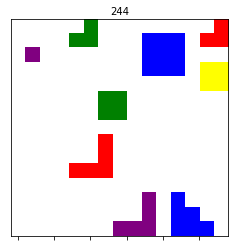

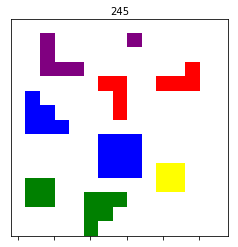

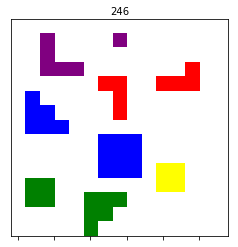

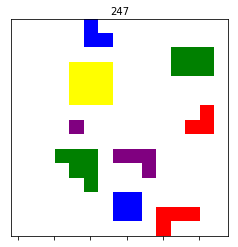

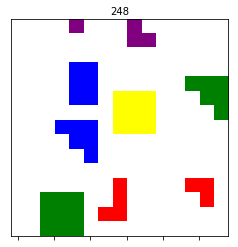

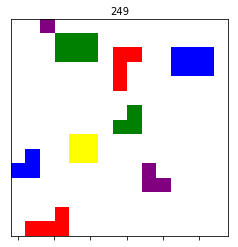

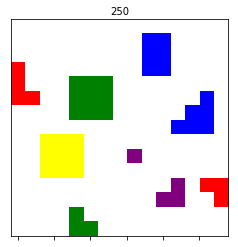

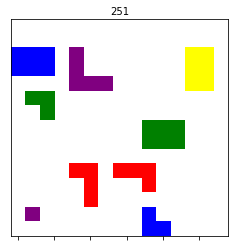

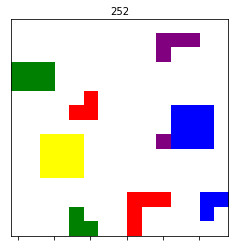

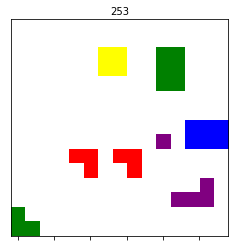

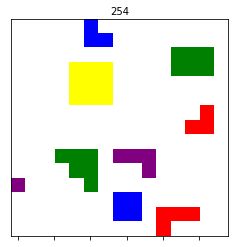

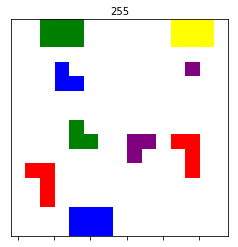

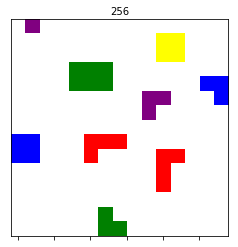

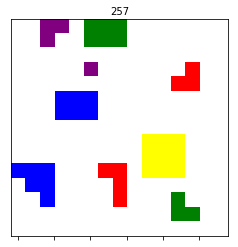

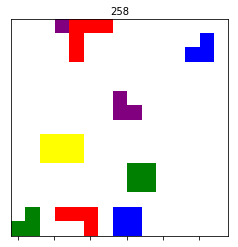

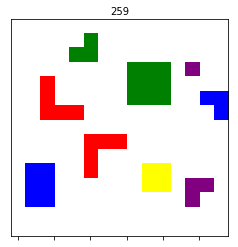

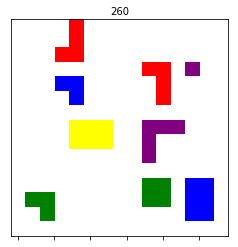

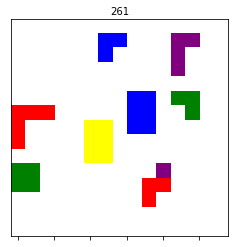

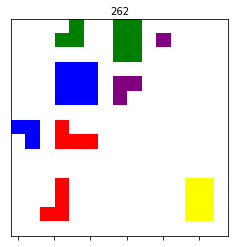

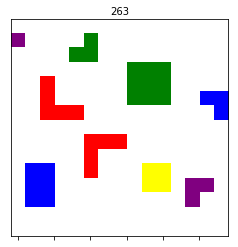

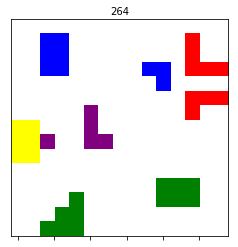

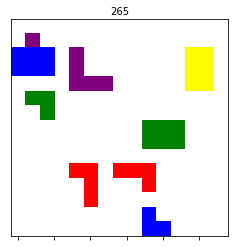

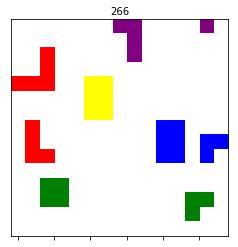

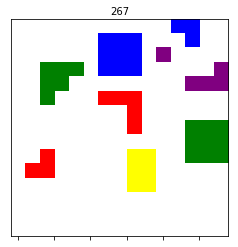

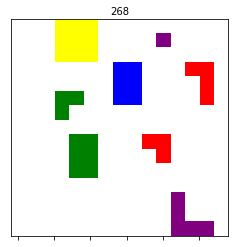

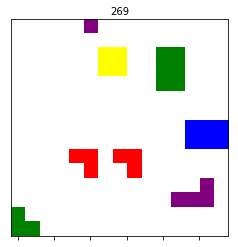

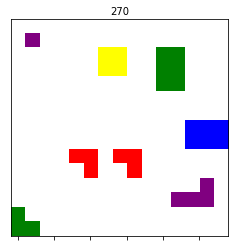

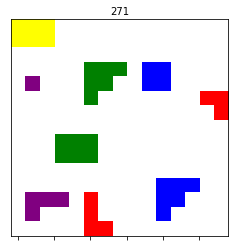

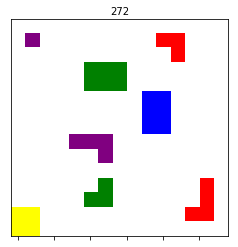

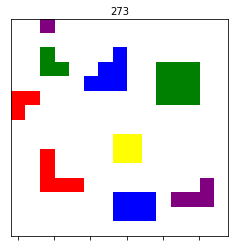

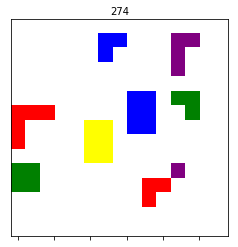

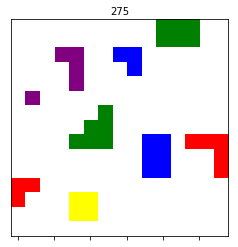

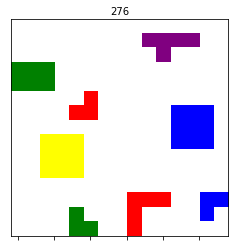

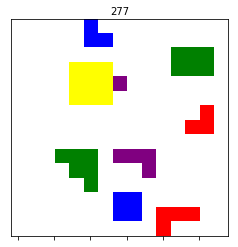

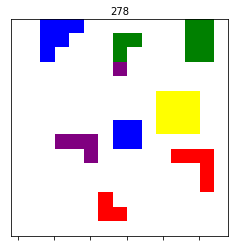

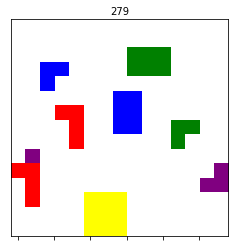

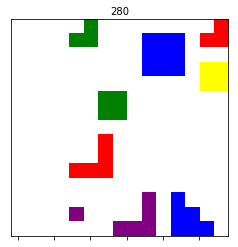

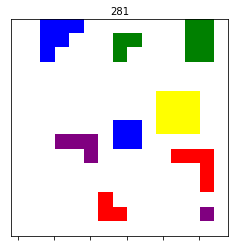

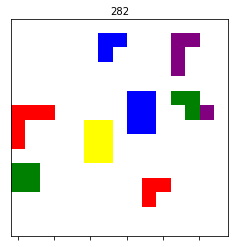

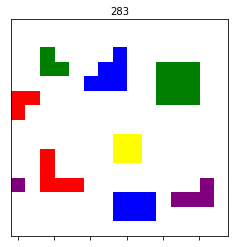

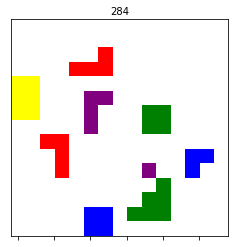

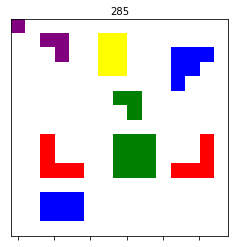

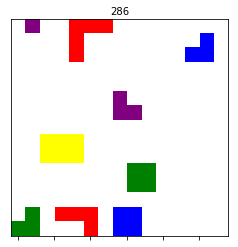

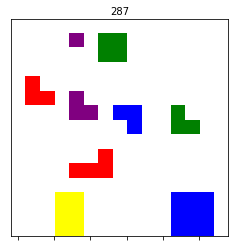

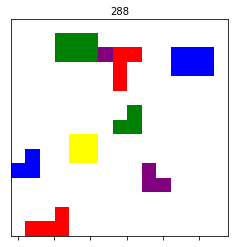

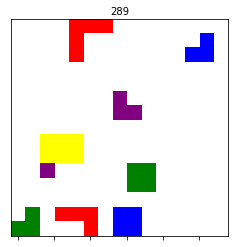

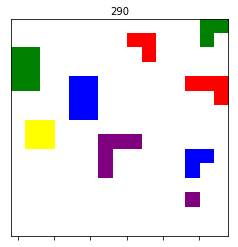

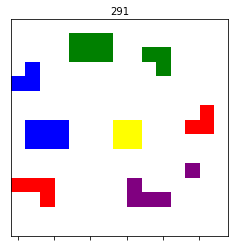

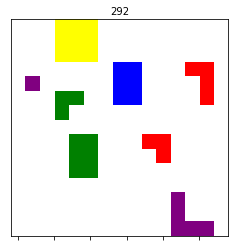

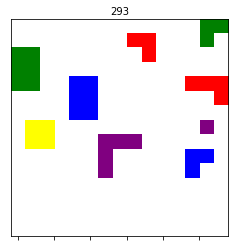

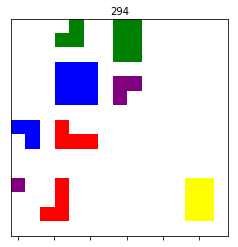

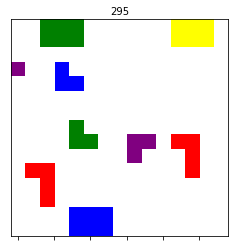

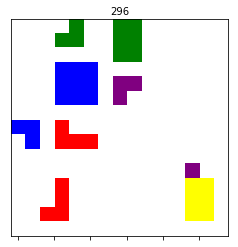

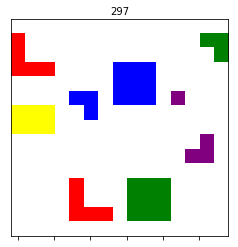

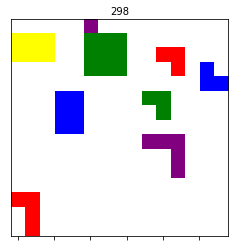

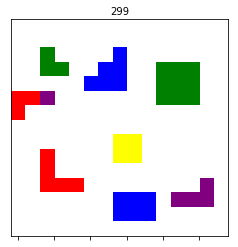

In [150]:
params = [(3, 3, 2, (2, 3)), (3, 3, 3, (2, 3)), (2, 3, 3, (2, 3)), (3, 2, 3, (2, 3)), (4, 3, 3, (2, 3))]

frame_src_tar_paths = []

for param in params:
    for i in range(11):
        f = generate_rectangle.generate_frame ( 15, 3, 3, 2, (2, 3) )
        for _ in range(6):
            src, target = generate_rectangle.generate_src_target ( f, 15 )
            new_path = generate_path_after_block (f, src, target)
            
            if new_path != None:
                frame_src_tar_paths.append(((f, src, target, new_path)))

frame_src_tar_paths = np.random.permutation(frame_src_tar_paths[:300])

print ('Generating done!!')
for i, p in enumerate(frame_src_tar_paths):
    animate(*p, name = str(i) + ".mp4", show = False, label = str(i))

In [317]:
target

(10, 3)

In [91]:
frame_src_tar_paths = []

for i in range(10):
    f = generate_rectangle.generate_frame ( 15, 3, 3, 2, (2, 3) )
    src, target = generate_rectangle.generate_src_target ( f, 20 )
    new_path = generate_path_after_block (f, src, target)
    
    if new_path != None:
        frame_src_tar_paths.append( (f, src, target, new_path) )

In [115]:
f = generate_rectangle.generate_frame ( 15, *[3, 3, 2, (2, 3)] )